## Observations and Insights 

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")
# Display the data table for preview
# combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice.
mouse_count = combined_df['Mouse ID'].count()
# mouse_count

1893

In [11]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouseID = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
dup_mouseID.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_df = combined_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
new_combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
unique_mouse = new_combined_df['Mouse ID'].count()
unique_mouse

1888

## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor 
# volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summ_group = new_combined_df.groupby('Drug Regimen')
# summ_stats.count().head(10)

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
summ_mean = summ_group['Tumor Volume (mm3)'].mean()
# summ_mean
summ_median = summ_group['Tumor Volume (mm3)'].median()
# summ_median
summ_var = summ_group['Tumor Volume (mm3)'].std()
# summ_var
summ_sem = summ_group['Tumor Volume (mm3)'].sem()
# summ_sem

# Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summ_stats = pd.DataFrame({'Mean':summ_mean, 'Median':summ_median, 'Variance':summ_var, 'SEM':summ_sem})
summ_stats.head(15)

,Mean,Median,Variance,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.393463,50.909965,6.568014,0.525862
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [8]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

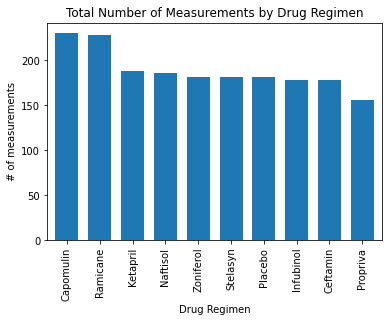

<Figure size 432x288 with 0 Axes>

In [44]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_df = new_combined_df['Drug Regimen'].value_counts()
# bar_df

mousebar = bar_df.plot(kind="bar", title="Total Number of Measurements by Drug Regimen", width=0.7)
mousebar.set_xlabel("Drug Regimen")
mousebar.set_ylabel("# of measurements")

plt.show()
plt.tight_layout()

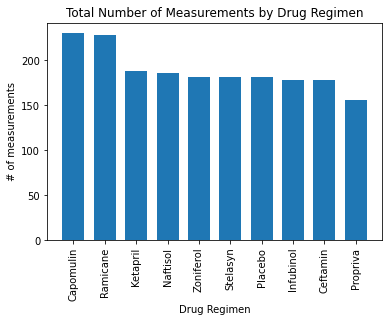

<Figure size 432x288 with 0 Axes>

In [47]:
#import numpy dependency
import numpy as np

# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
y_axis = bar_df
x_axis = np.arange(len(y_axis))

plt.bar(x_axis, y_axis, align="center", width=0.7)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"])
plt.xticks(rotation = 90)
plt.title("Total Number of Measurements by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of measurements")
# plt.xlim(-0.75,len(gyms)-.25)
# plt.ylim(0,max(members)+5)
plt.show()
plt.tight_layout()

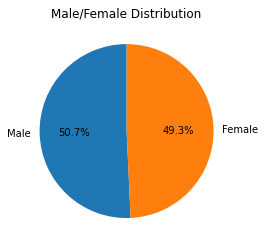

<Figure size 432x288 with 0 Axes>

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_df = new_combined_df['Sex'].value_counts()
# pie_df

piemouse = pie_df.plot(kind="pie", autopct="%1.1f%%", startangle = 90, title="Male/Female Distribution")
piemouse.set_ylabel('')

plt.show()
plt.tight_layout()

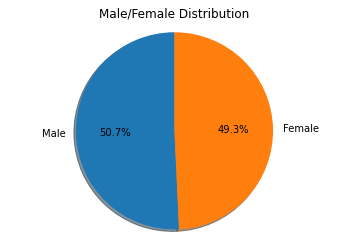

<Figure size 432x288 with 0 Axes>

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
counts = pie_df

plt.pie(counts, labels=labels,autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.title("Male/Female Distribution")

plt.show()
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
